# Lab 5: Bayesian models
We will first learn a GP regressor for an artificial, non-linear function to illustrate some basic aspects of GPs. To this end, we consider a sinusoidal function from which we sample a dataset. 

In [1]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The function to predict and the dataset we create from it:

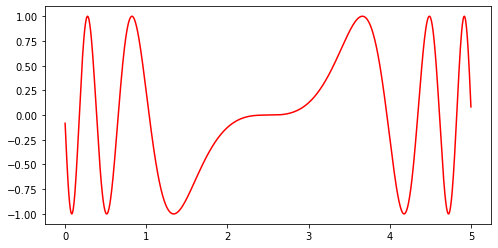

In [2]:
def f(x):
    """The function to predict."""
    return np.sin((x - 2.5) ** 3)

plt.figure(figsize=(8,4))
t = np.linspace(0,5,1000)
plt.plot(t, f(t), 'r', label = 'original f(x)')

The dataset we create based on the function:

In [3]:
# Dataset sampled from a sine function
rng = np.random.RandomState(4)
X_ = rng.uniform(0, 5, 1000)[:, np.newaxis]
y_ = f(X_).ravel()

In [4]:
def plot_gp(g, X_train, y_train, X_full, y_full, y_pred_mean, y_pred_std, use_title="yes"):
    """
    Visualizes the GP predictions, training points and original function
    
    Attributes:
    X_train -- The training data
    y_train -- The correct labels
    X_full -- The data to calculate predictions
    y_full -- The correct labels of the prediction data
    y_pred_mean -- the predicted means
    y_pred_std -- the predicted st. devs.
    """
    x_ = np.linspace(0, 5, 1000)[:,np.newaxis]
    
    idx = np.argsort(X_full[:,0])
    
    # Original function
    a = X_full[idx]
    b = y_full[idx]
    
    plt.figure(figsize=(8,4))
    plt.plot(a, 
             b, 'r', label = 'original f(x)')
    
    # Training points
    plt.scatter(X_train, y_train, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    
    # Prediction 
    d = y_pred_mean[idx]
    e = y_pred_std[idx]
    plt.plot(a, d, 'k', lw=1, zorder=9)
    plt.fill_between(a[:,0], d - 1.96*e, d + 1.96*e, alpha=0.2, color='k')
    
    if use_title == "yes":
        plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (g.kernel_, g.log_marginal_likelihood(g.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

## Exercise 1: visualizing predictions

Train a GP regressor with a RBF kernel with default hyperparameters on a 1% sample of the sine data. Note that by learning a GP the hyperparameters of the chosen kernel are tuned automatically. To visualize what the GP has learned, use the model to predict values for the entire dataset. Plot the original function, the predictions and the training data points. You can use the function `plot_gp()` to assist with plotting.

/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


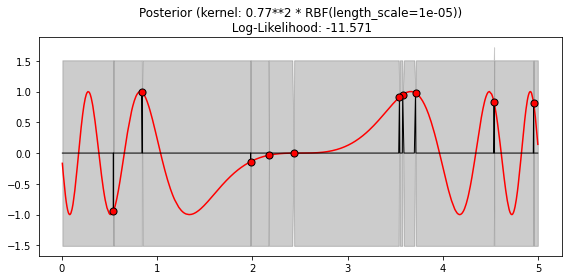

In [72]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

def plot_gp_2(X, y, gp_params={'kernel': (1 * RBF(1.0))}, train_size=0.7):
    X_train, _, y_train, _ = train_test_split(X, y, train_size=train_size, random_state=0)
    gp = GaussianProcessRegressor(**gp_params).fit(X_train, y_train)
    preds = gp.predict(X, return_std=True)
    plot_gp(gp, X_train=X_train, y_train=y_train, X_full=X, y_full=y, y_pred_mean=preds[0], y_pred_std=preds[1])
    
gp_params = {'kernel': (1 * RBF(1.0))}
plot_gp_2(X_,y_, gp_params, train_size=0.01)



## Exercise 2: reducing the uncertainty
Fit a model using 5% and 10% of the data. Now try setting `n_restarts_optimizer` in the `GaussianProcessRegressor` constructor. Plot the results. What differences do you see?

/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


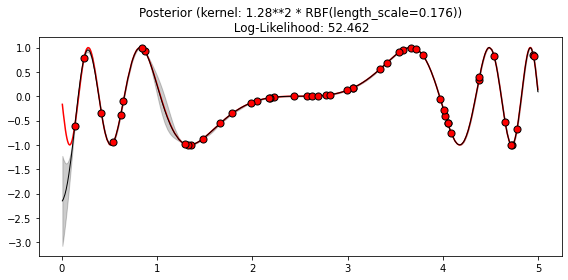

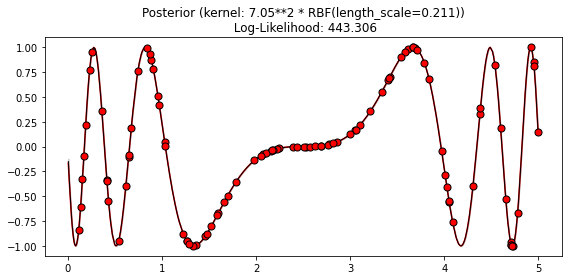

In [73]:
gp_params = {'kernel': (1 * RBF(1.0)), 'n_restarts_optimizer':5}
plot_gp_2(X_, y_, gp_params, train_size=0.05)
plot_gp_2(X_, y_, gp_params, train_size=0.1)

## Exercise 3: Kernels
Like SVMs, kernels play a major role in GPs. Using a 5% sample of the data, train one GP  with each of the following kernels:
    
* RBF
* RationalQuadratic
* ExpSineSquared
* DotProduct
* Matern

What differences do you see in the log-likelihood? Which model fit best the training data?

/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) 

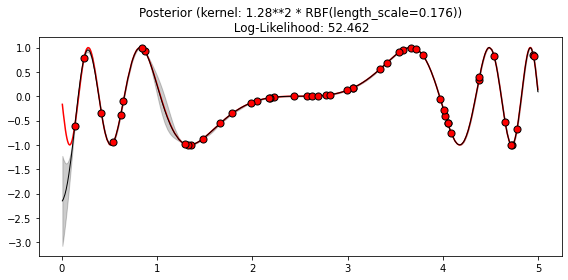

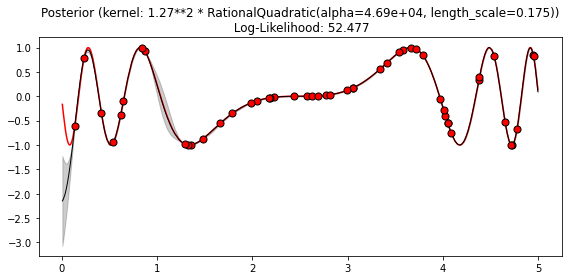

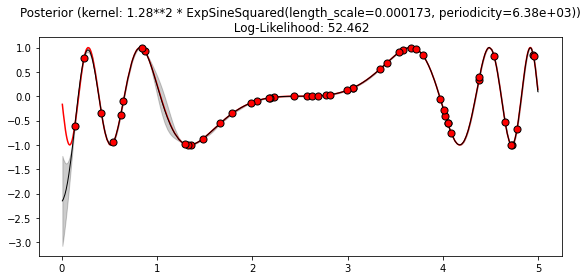

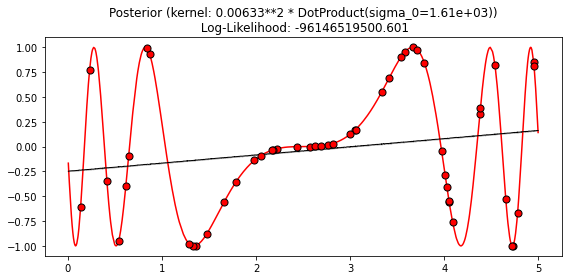

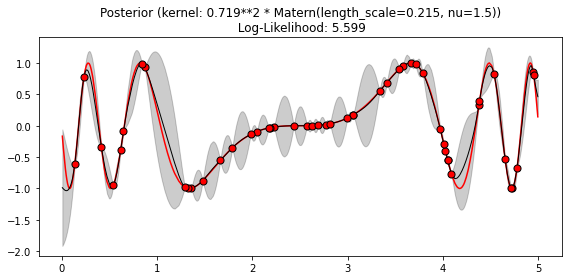

In [66]:
kernels = [(1*RBF()), (1*RationalQuadratic()), (1*ExpSineSquared()), (1*DotProduct()), (1*Matern())]
for kernel in kernels:
    plot_gp_2(X_, y_, gp_params={'kernel':kernel, 'n_restarts_optimizer':5}, train_size=0.05)

The RBF kernel has the maximum Log-Likelihood out of all kernels. It also seems to fit the training data best \
Although the RationalQuadratic kernel is very close in performance.

## Exercise 4: Mauna Loa data
We now look at the problem of predicting the monthly average CO2 concentrations collected at the Mauna Loa Observatory in Hawaii, between 1958 and 2001. This is a time-series data.

In [51]:
from sklearn.datasets import fetch_openml

# originally from sci-kit learn
def load_mauna_loa_atmospheric_co2():
    ml_data = fetch_openml(data_id=41187, as_frame=False)
    months = []
    ppmv_sums = []
    counts = []

    y = ml_data.data[:, 0]
    m = ml_data.data[:, 1]
    month_float = y + (m - 1) / 12
    ppmvs = ml_data.target

    for month, ppmv in zip(month_float, ppmvs):
        if not months or month != months[-1]:
            months.append(month)
            ppmv_sums.append(ppmv)
            counts.append(1)
        else:
            # aggregate monthly sum to produce average
            ppmv_sums[-1] += ppmv
            counts[-1] += 1

    months = np.asarray(months).reshape(-1, 1)
    avg_ppmvs = np.asarray(ppmv_sums) / counts
    return months, avg_ppmvs


X_mauna, y_mauna = load_mauna_loa_atmospheric_co2()

Quick visualization:

Text(0, 0.5, 'co2')

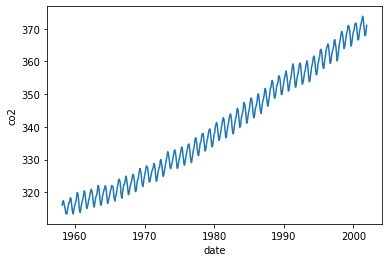

In [52]:
#Quick visualization
plt.plot(X_mauna,y_mauna)
plt.xlabel('date')
plt.ylabel('co2')

## Exercise 4.1
Signals like this usually consist of a combination of different "sub-signals", e.g. a long-term component, a seasonal component, a noise component, and so on. When defining a GP kernel, you can combine multiple kernels, such as:

* A RBF kernel can be used to explain long-term, smooth patterns.
* The seasonal component can be modeled by an `ExpSineSquared` component.
* Small and medium-term irregularities can be modeled by a `RationalQuadratic` component.
* `WhiteNoise` kernel to model white noise.

Train a GP using the first 75% data points as training data using the kernel below. Experiment with removing one or more kernels and check the results visually (you can use `plot_gp`). What do you observe?

/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/twan/anaconda3/envs/ml_engineering/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


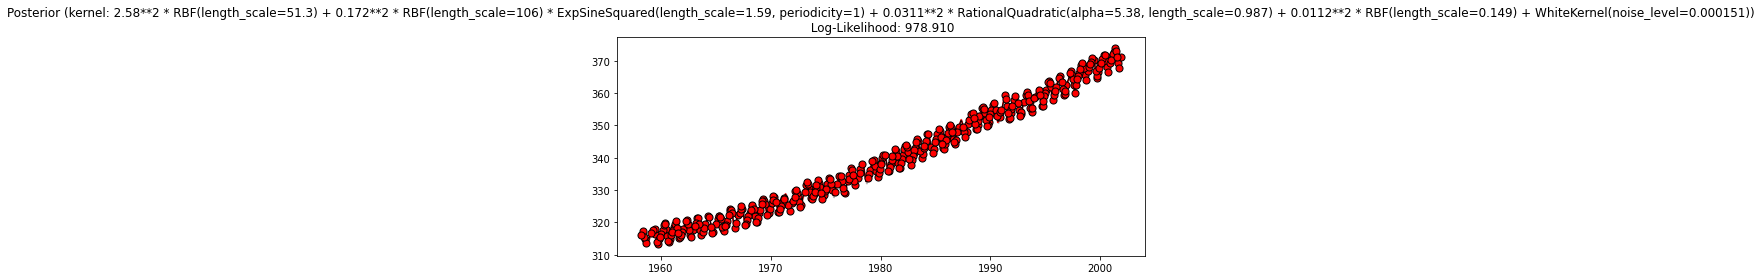

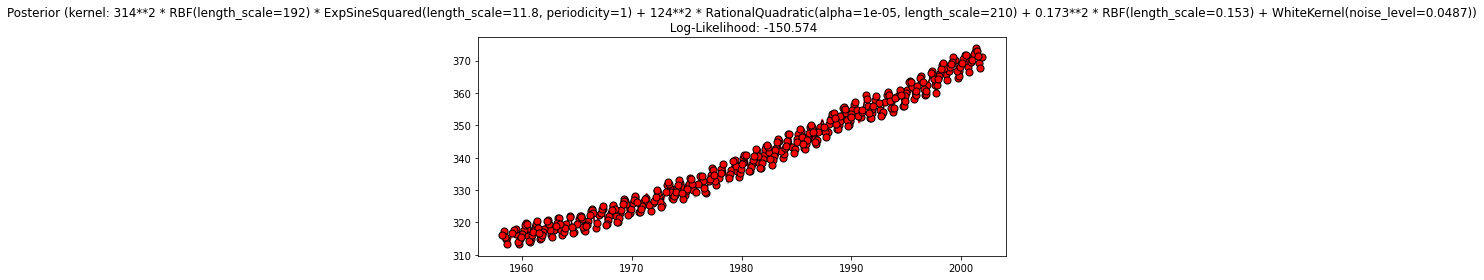

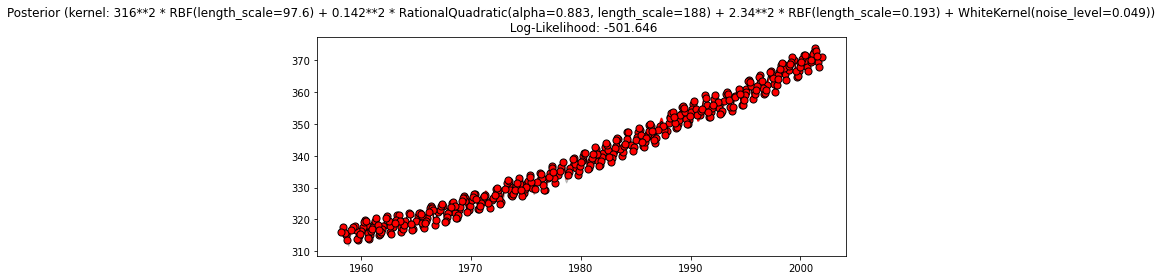

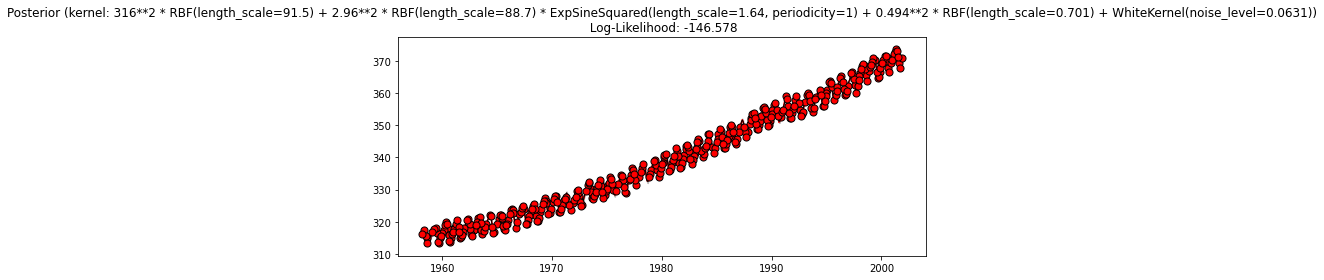

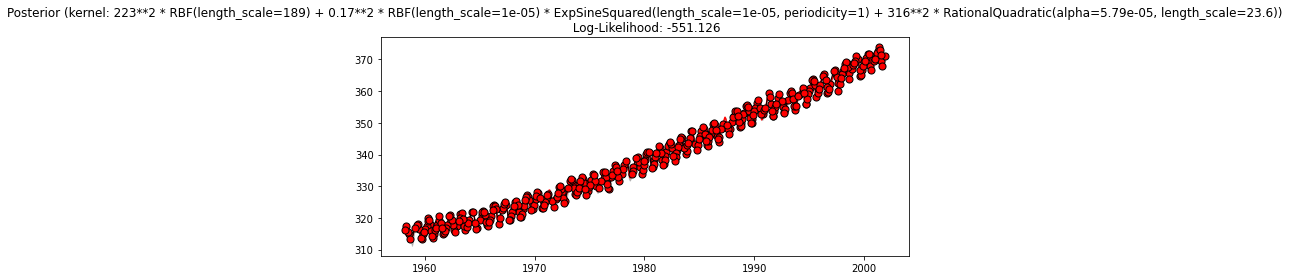

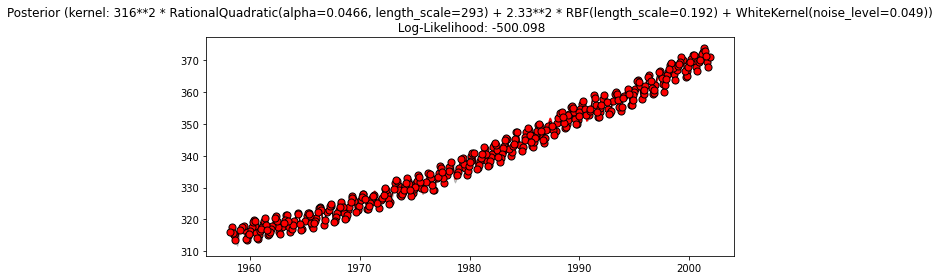

In [74]:
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ExpSineSquared, RationalQuadratic

k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-5, np.inf))  # noise terms

# using all kernels
kernel = k1 + k2 +  k3 + k4
plot_gp_2(X_mauna, y_mauna, gp_params={'kernel': kernel, 'normalize_y': True}, train_size=0.75)

# removing long term kernel
kernel =  k2 + k3 + k4
plot_gp_2(X_mauna, y_mauna, gp_params={'kernel': kernel}, train_size=0.75)

# removing seasonal component
kernel = k1 + k3 + k4
plot_gp_2(X_mauna, y_mauna, gp_params={'kernel': kernel}, train_size=0.75)

# removing medium term component
kernel = k1 + k2 + k4
plot_gp_2(X_mauna, y_mauna, gp_params={'kernel': kernel}, train_size=0.75)

#removing noise terms
kernel = k1 + k2 +  k3
plot_gp_2(X_mauna, y_mauna, gp_params={'kernel': kernel}, train_size=0.75)

#removing long + seasonal
kernel = k3 + k4
plot_gp_2(X_mauna, y_mauna, gp_params={'kernel': kernel}, train_size=0.75)

